In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.forecasting.stl import STLForecast
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [47]:
train_file_path = "/content/DailyDelhiClimateTrain.csv"
test_file_path = "/content/DailyDelhiClimateTest.csv"

In [49]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [ ]:
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])
train_df.set_index('date', inplace=True)
test_df.set_index('date', inplace=True)

In [ ]:
print("Missing values in train dataset:\n", train_df.isnull().sum())
print("Missing values in test dataset:\n", test_df.isnull().sum())

print("\nTrain dataset statistics:\n", train_df.describe())
print("\nTest dataset statistics:\n", test_df.describe())

Missing values in train dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64
Missing values in test dataset:
 meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

Train dataset statistics:
           meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333

Test dataset statistics:
          meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      

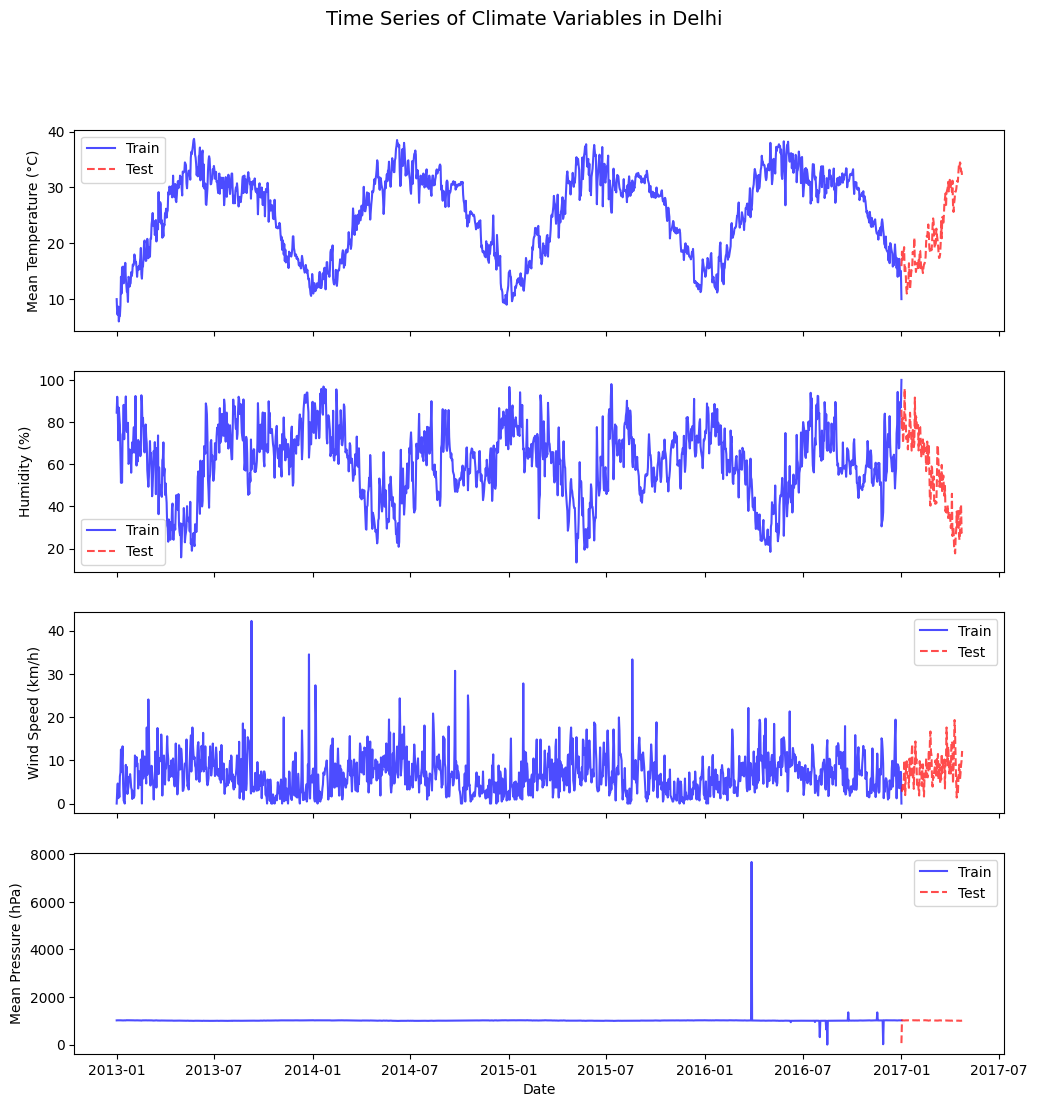

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(12, 12), sharex=True)

variables = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']
titles = ['Mean Temperature (°C)', 'Humidity (%)', 'Wind Speed (km/h)', 'Mean Pressure (hPa)']

for i, var in enumerate(variables):
    axes[i].plot(train_df.index, train_df[var], label='Train', color='blue', alpha=0.7)
    axes[i].plot(test_df.index, test_df[var], label='Test', color='red', linestyle='dashed', alpha=0.7)
    axes[i].set_ylabel(titles[i])
    axes[i].legend()

plt.suptitle("Time Series of Climate Variables in Delhi", fontsize=14)
plt.xlabel("Date")
plt.show()


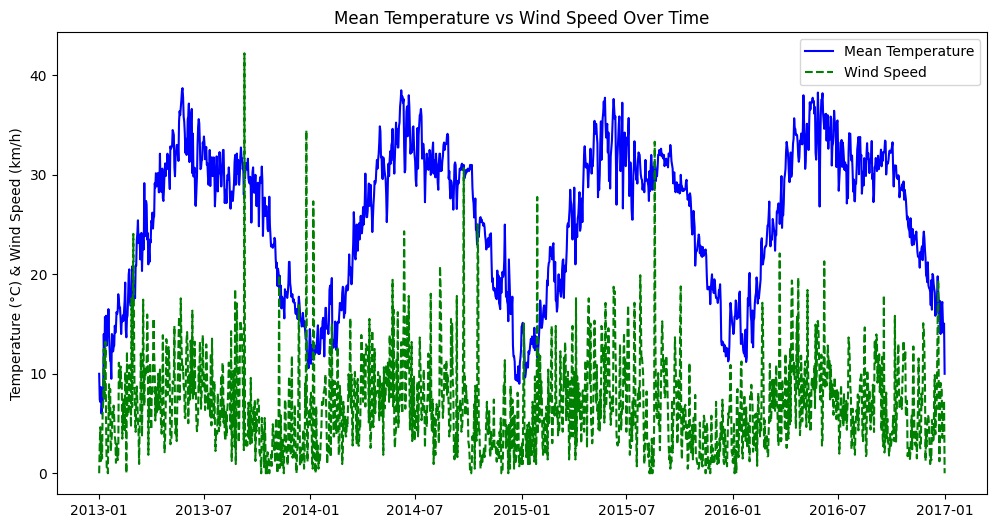

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(train_df.index, train_df['meantemp'], label='Mean Temperature', color='blue')
ax.plot(train_df.index, train_df['wind_speed'], label='Wind Speed', color='green', linestyle='dashed')
ax.set_ylabel("Temperature (°C) & Wind Speed (km/h)")
ax.set_title("Mean Temperature vs Wind Speed Over Time")
ax.legend()
plt.show()

In [ ]:
decomposition = seasonal_decompose(train_df['meantemp'], model='additive', period=365)

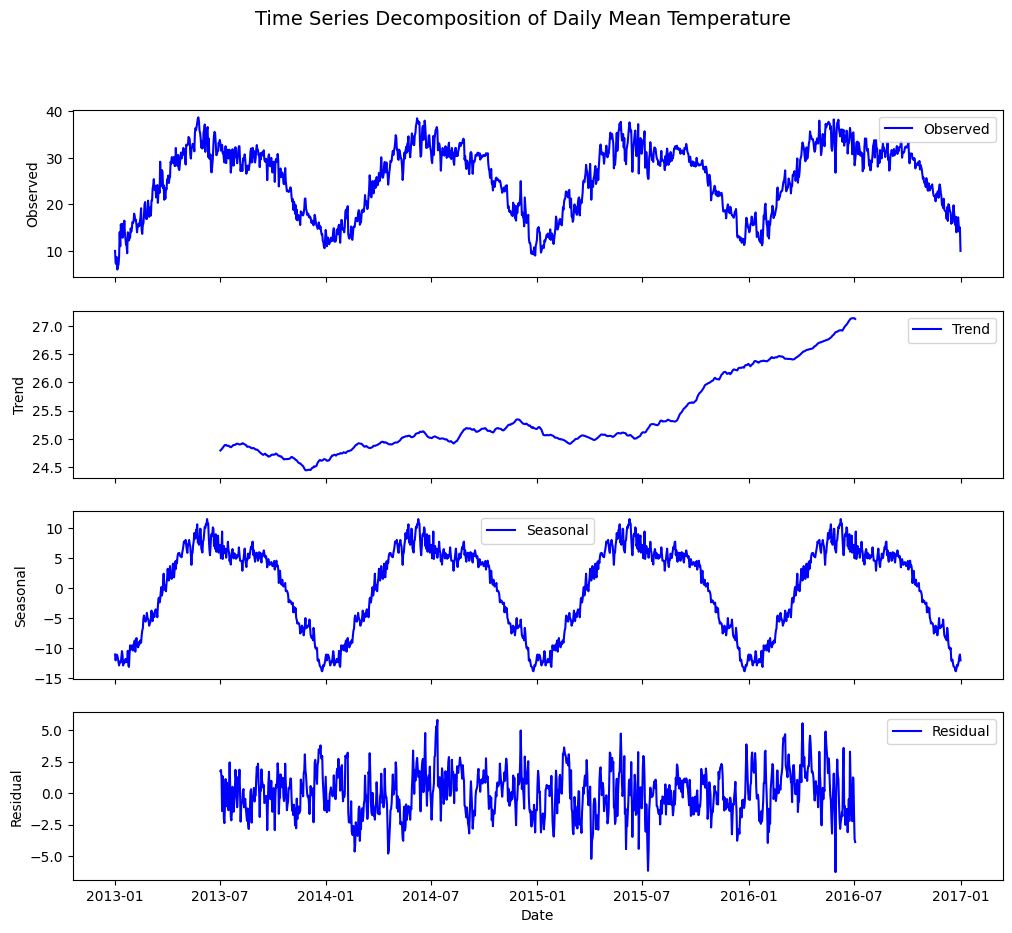

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
components = ['Observed', 'Trend', 'Seasonal', 'Residual']
data = [train_df['meantemp'], decomposition.trend, decomposition.seasonal, decomposition.resid]

for i, (comp, dat) in enumerate(zip(components, data)):
    axes[i].plot(train_df.index, dat, label=comp, color='blue')
    axes[i].set_ylabel(comp)
    axes[i].legend()

plt.suptitle("Time Series Decomposition of Daily Mean Temperature", fontsize=14)
plt.xlabel("Date")
plt.show()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using

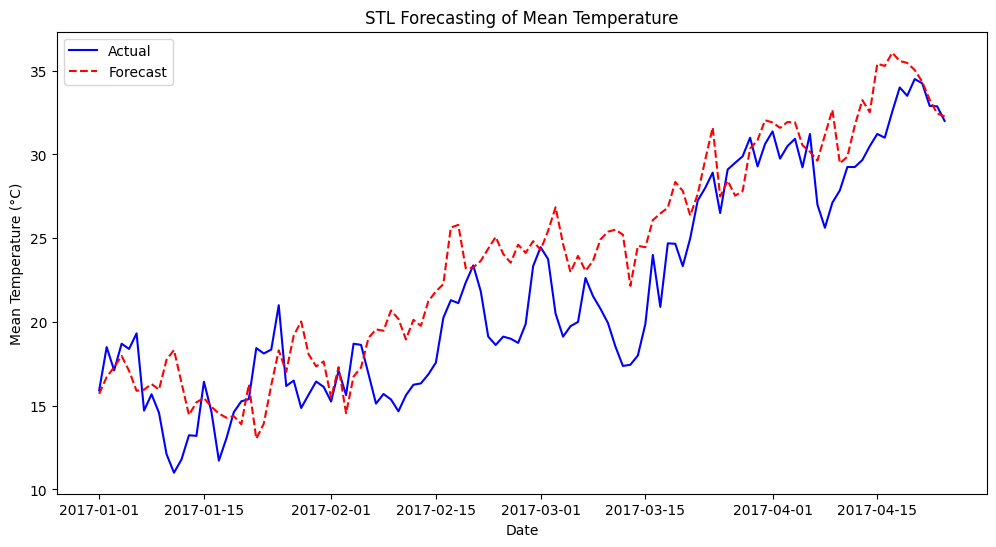

Mean Absolute Error (MAE): 2.6728644276648996
Root Mean Squared Error (RMSE): 3.313261656057165


In [ ]:
train_data = train_df['meantemp']
test_data = test_df['meantemp']

# Fit STL with ARIMA model for forecasting
stl_forecast = STLForecast(train_data, ARIMA, model_kwargs={"order": (1, 1, 1)}, period=365)
stl_model = stl_forecast.fit()
forecast_values = stl_model.forecast(len(test_data))

# Evaluate forecasting performance
mae = mean_absolute_error(test_data, forecast_values)
rmse = np.sqrt(mean_squared_error(test_data, forecast_values))

# Plot the forecast vs actual values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data, label="Actual", color="blue")
plt.plot(test_data.index, forecast_values, label="Forecast", color="red", linestyle="dashed")
plt.xlabel("Date")
plt.ylabel("Mean Temperature (°C)")
plt.title("STL Forecasting of Mean Temperature")
plt.legend()
plt.show()

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")